## NOAA Fisheries Data Challenge

Starting in the 1940s, the Sardine fishery in the southern pacific went through a dramatic transformation  Use the dataset from the NOAA website to learn what happened. Record your process below.

#### Prep Code

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

os.chdir("C:/Users/drewc/Documents/stories")

noaa = pd.read_csv("data/fish_data_noaa.csv")

temp = pd.read_csv("data/fish_data_oceantemps.csv")

#### Group NOAA data By Year, State, and Species. Drop Columns.

In [2]:
group = noaa.groupby(["Year", "State", "Species"], as_index = False).sum()
ready = group.drop(["Dollars"], axis=1)

#### Filter Dataset for Sardines in California

In [4]:
sard = ready[ready.Species == "SARDINE, PACIFIC"]
ca = sard[sard.State == "California"]

#### Define Varriables and Create Plot with Labels, Title and Legend

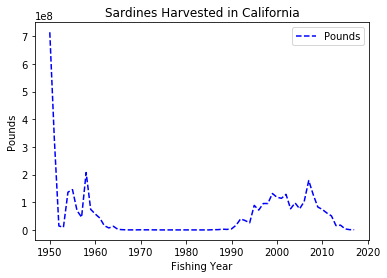

In [5]:
x = ca["Year"]
y = ca["Pounds"]
plt.plot(x, y, 'b--')
plt.ylabel("Pounds")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")
plt.show()

#### Create filtered plot for after 1985 

Text(0.5, 1.0, 'Sardines Harvested in California')

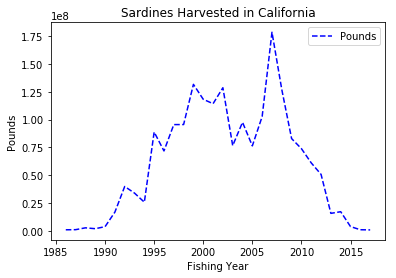

In [7]:
ca85 = ca[ca.Year > 1985]
x85 = ca85["Year"]
y85 = ca85["Pounds"]
plt.plot(x85, y85, 'b--')
plt.ylabel("Pounds")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Sardines Harvested in California")

## Water Temperature

After the Sardine returned in the late eighties, the population began to fluctuate. Compare the water temperature dataset to assess any relationship. 

#### Group Temperature Data by day, month, and year average

In [13]:
group = temp.groupby(["Year", "Month", "Day"]).mean()
groups = group.groupby("Year")["Surf"].mean() 
groupb = group.groupby("Year")["Bottom"].mean() 

#### Convert Series to Frame, Reset Index, and Combine back together

In [16]:
dfs = groups.to_frame()
dfb = groupb.to_frame()

indexs = dfs.reset_index(level=["Year"])
indexb = dfb.reset_index(level=["Year"])

indexb["Surf"] = indexs["Surf"]
tm = indexb

#### Define Varriables and Create Plot with Labels, Title and Legend

Text(0.5, 1.0, 'Water Temperature in Southern California')

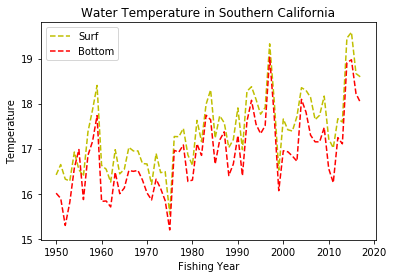

In [17]:
xt = tm["Year"]
ys = tm["Surf"]
yb = tm["Bottom"]
plt.plot(xt, ys, 'y--')
plt.plot(xt, yb, 'r--')
plt.ylabel("Temperature")
plt.xlabel("Fishing Year")
plt.legend()
plt.title("Water Temperature in Southern California")

#### Plot All Data Together

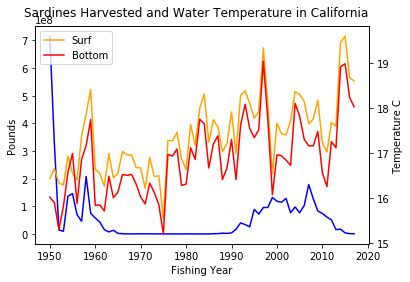

In [18]:
fig, ax1 = plt.subplots()

x = ca["Year"]
y = ca["Pounds"]
ax1.plot(x, y, color = "blue")
ax1.set_ylabel("Pounds")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

xt = tm["Year"]
ys = tm["Surf"]
ax2.plot(xt, ys, "orange")
ax2.set_ylabel("Temperature C")

yb = tm["Bottom"]
plt.plot(xt, yb, "red")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Plot All Data Together after 1985

Text(0.5, 0.95, 'Sardines Harvested and Water Temperature in California')

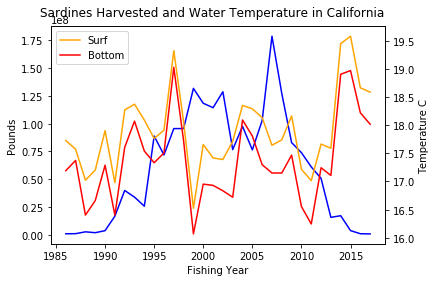

In [21]:
fig, ax1 = plt.subplots()

ca85 = ca[ca.Year > 1985]
x85 = ca85["Year"]
y85 = ca85["Pounds"]
ax1.plot(x85, y85, color = "blue")
ax1.set_ylabel("Pounds")
ax1.set_xlabel("Fishing Year")

ax2 = ax1.twinx()

tm85 = tm[tm.Year > 1985]
xt85 = tm85["Year"]
ys85 = tm85["Surf"]
ax2.plot(xt85, ys85, "orange")
ax2.set_ylabel("Temperature C")

yb85 = tm85["Bottom"]
plt.plot(xt85, yb85, "red")

plt.legend()
fig.suptitle("Sardines Harvested and Water Temperature in California", y = 0.95, fontsize = 12)

#### Perform Linear Regression on after 1985 data

In [23]:
model = LinearRegression(fit_intercept = False)

xsr = np.array(tm85["Bottom"]).reshape((-1, 1))
ysr = np.array(ca85["Pounds"]).reshape((-1, 1))

model.fit(xsr, ysr)
model.score(xsr, ysr)

-0.0245029504931622